In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
from matplotlib import rcParams

# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('bmh')

# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

#sns.set_style("whitegrid")
#sns.set_context("poster")


In [2]:
sdge = pd.read_csv('hourly1418_energy_temp_PV.csv', index_col = 'Dates', parse_dates=['Dates', 'Date'])

In [3]:
sdge.head()

,SDGE,Date,year,month,day,hour,weekday,season,holiday,non_working,STATION,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature,AC_kW,cum_AC_kW
Dates,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2096.0,2014-01-01,2014,1,1,0,Wednesday,winter,1,non-working,72290023188,0.0,7.0,51.0,0.0,220992.227
2014-01-01 01:00:00,1986.0,2014-01-01,2014,1,1,1,Wednesday,winter,1,non-working,72290023188,0.0,7.0,51.5,0.0,220992.227
2014-01-01 02:00:00,1936.0,2014-01-01,2014,1,1,2,Wednesday,winter,1,non-working,72290023188,0.0,7.0,51.8,0.0,220992.227
2014-01-01 03:00:00,1896.0,2014-01-01,2014,1,1,3,Wednesday,winter,1,non-working,72290023188,0.0,7.0,50.0,0.0,220992.227
2014-01-01 04:00:00,1899.0,2014-01-01,2014,1,1,4,Wednesday,winter,1,non-working,72290023188,0.0,7.0,48.8,0.0,220992.227


In [4]:
# creating categorical columns for linear regression 
cat_cols = ['year', 'month', 'day', 'hour', 'weekday', 'season', 'holiday', 'non_working']

for col in cat_cols:
    sdge[col] = sdge[col].astype('category')

In [5]:
sdge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2014-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 16 columns):
SDGE                        43824 non-null float64
Date                        43824 non-null datetime64[ns]
year                        43824 non-null category
month                       43824 non-null category
day                         43824 non-null category
hour                        43824 non-null category
weekday                     43824 non-null category
season                      43824 non-null category
holiday                     43824 non-null category
non_working                 43824 non-null category
STATION                     43824 non-null int64
DailyCoolingDegreeDays      43824 non-null float64
DailyHeatingDegreeDays      43824 non-null float64
HourlyDryBulbTemperature    43824 non-null float64
AC_kW                       43824 non-null float64
cum_AC_kW                   43824 non-null float64
dtypes: category(8), dateti

In [6]:
# Preparing dummy columns for use in sklearn's linear regression 
sdge_lin = pd.get_dummies(sdge, drop_first = True)

In [7]:
sdge_lin.head()

,SDGE,Date,STATION,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature,AC_kW,cum_AC_kW,year_2015,year_2016,...,hour_23,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_winter,holiday_1,non_working_working
Dates,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2096.0,2014-01-01,72290023188,0.0,7.0,51.0,0.0,220992.227,0,0,...,0,0,0,0,0,0,1,1,1,0
2014-01-01 01:00:00,1986.0,2014-01-01,72290023188,0.0,7.0,51.5,0.0,220992.227,0,0,...,0,0,0,0,0,0,1,1,1,0
2014-01-01 02:00:00,1936.0,2014-01-01,72290023188,0.0,7.0,51.8,0.0,220992.227,0,0,...,0,0,0,0,0,0,1,1,1,0
2014-01-01 03:00:00,1896.0,2014-01-01,72290023188,0.0,7.0,50.0,0.0,220992.227,0,0,...,0,0,0,0,0,0,1,1,1,0
2014-01-01 04:00:00,1899.0,2014-01-01,72290023188,0.0,7.0,48.8,0.0,220992.227,0,0,...,0,0,0,0,0,0,1,1,1,0


In [8]:
sdge.columns

Index(['SDGE', 'Date', 'year', 'month', 'day', 'hour', 'weekday', 'season',
       'holiday', 'non_working', 'STATION', 'DailyCoolingDegreeDays',
       'DailyHeatingDegreeDays', 'HourlyDryBulbTemperature', 'AC_kW',
       'cum_AC_kW'],
      dtype='object')

### Fitting linear regression using statsmodel

In [9]:
# Checking linear regression fit using statsmodels Linear regression

m = ols('SDGE ~  C(year) + C(month) + C(hour) + C(season) + C(non_working) + \
                 HourlyDryBulbTemperature + cum_AC_kW', sdge).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   SDGE   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     3495.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:00:41   Log-Likelihood:            -3.0102e+05
No. Observations:               43824   AIC:                         6.021e+05
Df Residuals:                   43782   BIC:                         6.025e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

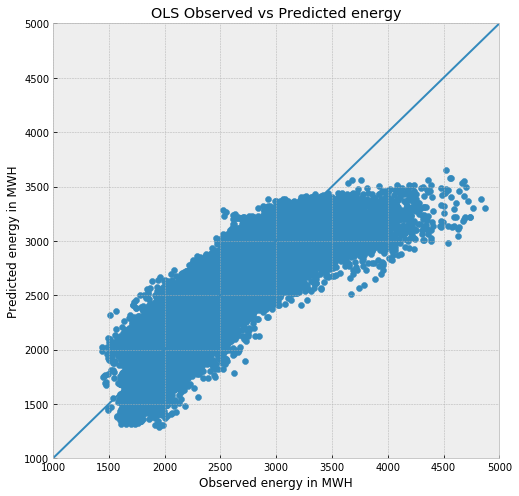

In [10]:
# predicted vs actual energy values
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(sdge.SDGE, m.fittedvalues) 
_ = plt.xlabel("Observed energy in MWH")
_ = plt.ylabel("Predicted energy in MWH")
_ = plt.title("OLS Observed vs Predicted energy")
_ = plt.xlim(1000, 5000)
_ = plt.ylim(1000, 5000)
#plotting 45 deg line to see how the prediction differs from the observed values
x = np.linspace(*ax.get_xlim())
_ = ax.plot(x, x)

* We see that the model predicts very well till ~3500MWH but then it fails to predict the higher energy consumption values.

### Fitting linear regression using sklearn

In [11]:
# Keeping only the necessary columns
sdge_lin.drop(['Date','STATION','DailyCoolingDegreeDays','DailyHeatingDegreeDays', 'AC_kW', \
              'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',\
              'weekday_Tuesday', 'weekday_Wednesday', 'holiday_1'], axis = 1, inplace = True)

In [12]:
# Using X_train as data from 2014 to 2017 as train set and 2018 as test set

# for X_train dropping the energy consumption column SDGE
X_train = sdge_lin.drop('SDGE', axis = 1).loc['2014':'2017']
y_train = sdge_lin.SDGE.loc['2014':'2017']

X_test = sdge_lin.drop('SDGE', axis = 1).loc['2018':'2018']
y_test = sdge_lin.SDGE.loc['2018':'2018']

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

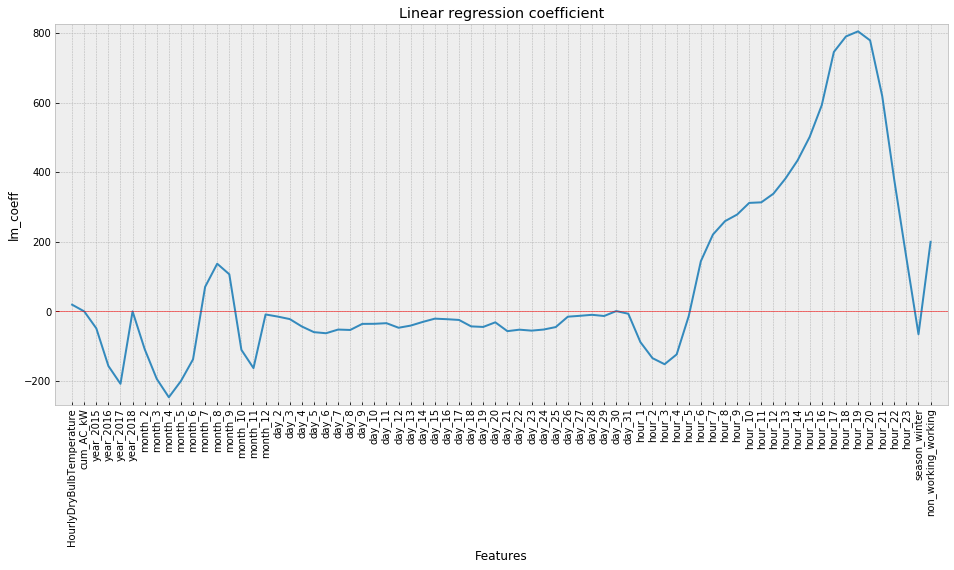

In [14]:
# The coefficients
#pd.DataFrame({'features': X_train.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
# Plot the coefficients
_ = plt.figure(figsize = (16, 7))
_ = plt.plot(range(len(X_train.columns)), lm.coef_)
_ = plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 90)
_ = plt.margins(0.02)
_ = plt.axhline(0, linewidth = 0.5, color = 'r')
_ = plt.title('Linear regression coefficient')
_ = plt.ylabel('lm_coeff')
_ = plt.xlabel('Features')

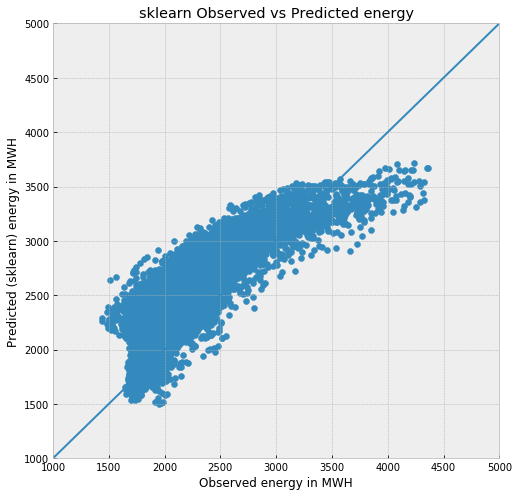

In [15]:
# Plotting lm.predict(X) vs boc.PRICE
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(y_test, lm.predict(X_test)) 
_ = plt.xlabel("Observed energy in MWH")
_ = plt.ylabel("Predicted (sklearn) energy in MWH")
_ = plt.title("sklearn Observed vs Predicted energy")
_ = plt.xlim(1000, 5000)
_ = plt.ylim(1000, 5000)
#plotting 45 deg line to see how the prediction differs from the observed values
x = np.linspace(*ax.get_xlim())
_ = ax.plot(x, x)

In [16]:
# R2 on train data
lm.score(X_train, y_train)

0.7768087996574952

In [17]:
# R2 on test data
lm.score(X_test, y_test)

0.3847019884697963

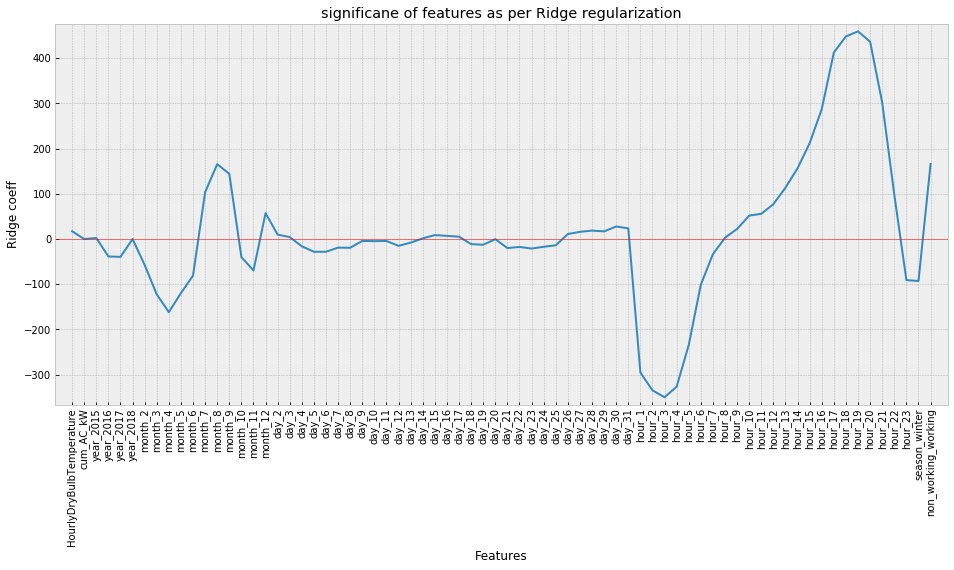

In [18]:
# Trying regularization: Ridge regression
from sklearn.linear_model import Ridge

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha = 0.2, normalize = True)

# Fit the regressor to the data
ridge.fit(X_train, y_train)

# Compute and print the coefficients
ridge_coef = ridge.coef_
#print(ridge_coef)

# Plot the coefficients
_ = plt.figure(figsize = (16, 7))
_ = plt.plot(range(len(X_train.columns)), ridge_coef)
_ = plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 90)
_ = plt.margins(0.02)
_ = plt.axhline(0, linewidth = 0.5, color = 'r')
_ = plt.title('significane of features as per Ridge regularization')
_ = plt.ylabel('Ridge coeff')
_ = plt.xlabel('Features')
################################################################################

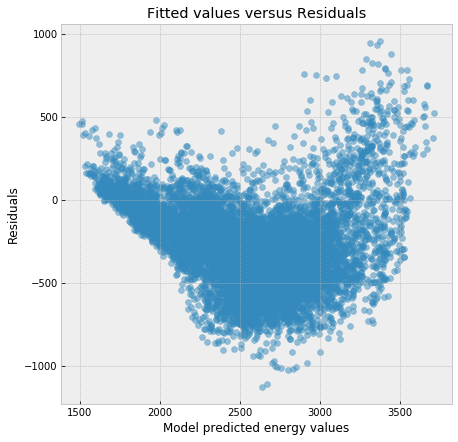

In [19]:
# PLotting the residuals
residuals = (y_test - lm.predict(X_test))
_ = plt.figure(figsize=(7,7))
_ = plt.scatter(lm.predict(X_test) , residuals, alpha = 0.5) 
_ = plt.xlabel("Model predicted energy values")
_ = plt.ylabel("Residuals")
_ = plt.title("Fitted values versus Residuals")

In [20]:
print("RMSE or Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, lm.predict(X_test))))

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(y_test, lm.predict(X_test)))

print('Mean Absolute Error: %.2f' % (np.sum(np.abs(y_test - lm.predict(X_test)))/len(y_test)))

RMSE or Root mean squared error: 363.69
Variance score: 0.38
Mean Absolute Error: 303.37


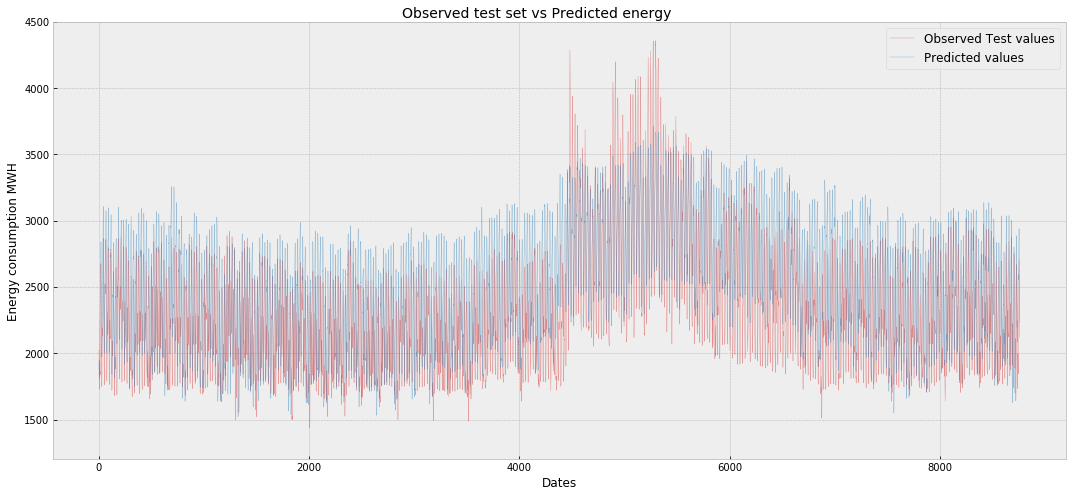

In [21]:
# Plotting the observed test energy and predicted energy data on the same graph as line plots
fig, ax1 = plt.subplots(figsize=(15,7))

color = 'tab:red'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Energy consumption MWH')
line, = ax1.plot(np.array(y_test), color = color, alpha = 0.5, linewidth = 0.4)
line.set_label('Observed Test values')
ax1.set_ylim(1200, 4500)

color = 'tab:blue'
line1, = ax1.plot(lm.predict(X_test), color = color, alpha = 0.5, linewidth = 0.4)   
line1.set_label('Predicted values')
ax1.legend(fontsize = 'large')

fig.suptitle('Observed test set vs Predicted energy', fontsize = 14)
fig.tight_layout()
plt.subplots_adjust(top = 0.95)

In [22]:
lm.predict(X_test).min(), lm.predict(X_test).mean(), lm.predict(X_test).max()

(1495.5965329181736, 2551.5865489329344, 3713.192835725985)

In [23]:
y_test.min(), y_test.mean(), y_test.max()

(1437.08112895935, 2293.8942837851023, 4358.10796517031)

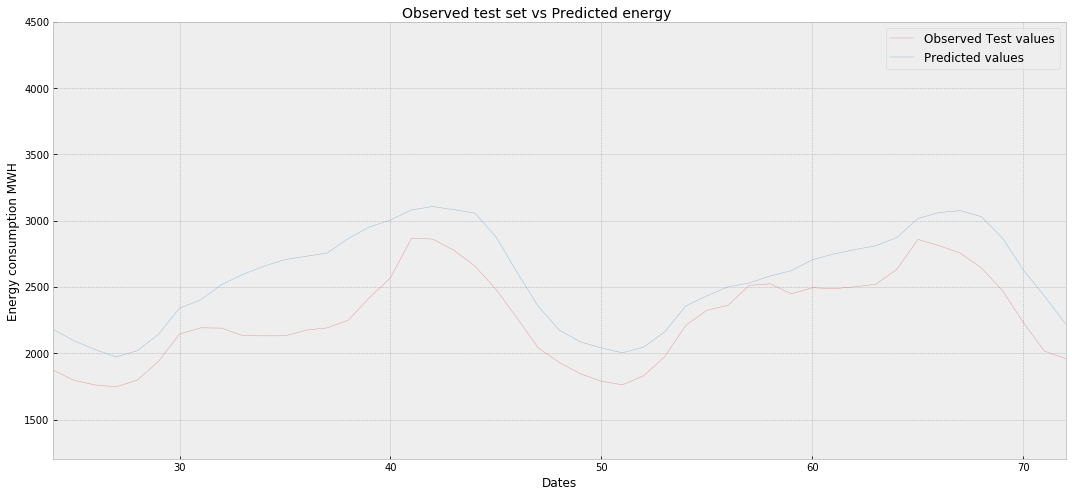

In [24]:
# Plotting the observed test energy and predicted energy data on the same graph as line plots
fig, ax1 = plt.subplots(figsize=(15,7))

color = 'tab:red'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Energy consumption MWH')
line, = ax1.plot(np.array(y_test), color = color, alpha = 0.5, linewidth = 0.4)
line.set_label('Observed Test values')
ax1.set_ylim(1200, 4500)
ax1.set_xlim(24, 72)
color = 'tab:blue'
line1, = ax1.plot(lm.predict(X_test), color = color, alpha = 0.5, linewidth = 0.4)   
line1.set_label('Predicted values')
ax1.legend(fontsize = 'large')

fig.suptitle('Observed test set vs Predicted energy', fontsize = 14)
fig.tight_layout()
plt.subplots_adjust(top = 0.95)